In [1]:
# import libraries

import pandas as pd
import numpy as np
import math as m
from ast import literal_eval
import itertools
import re


from matplotlib import rcParams
import matplotlib.pyplot as plt
import seaborn as sns

import datetime
import os

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder, MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.dummy import DummyClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import (VotingClassifier, 
                              RandomForestClassifier, 
                              AdaBoostClassifier, 
                              GradientBoostingClassifier, 
                              AdaBoostClassifier,
                              BaggingClassifier
                             )
from xgboost import XGBClassifier
from sklearn.linear_model import Lasso, Ridge, LinearRegression
from imblearn.pipeline import Pipeline as imbPipeline
from sklearn.pipeline import FeatureUnion
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import cross_val_score, cross_validate
from imblearn.over_sampling import SMOTENC
from imblearn.under_sampling import ClusterCentroids
from sklearn.metrics import (accuracy_score, 
                             f1_score, 
                             recall_score, 
                             precision_score,
                             precision_recall_curve,
                             make_scorer,
                             confusion_matrix,
                             plot_confusion_matrix,
                             plot_roc_curve,
                             classification_report,
                             roc_curve,
                             auc,
                             plot_precision_recall_curve,
                             roc_auc_score,
                             log_loss)
from sklearn.metrics import mean_squared_error, mean_squared_log_error
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer
                             
from statsmodels.formula.api import ols
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
                             
# For plotting the tree.
from sklearn.tree import export_graphviz, plot_tree
# from pydotplus import graph_from_dot_data
from IPython.display import Image
from sklearn import tree

import warnings
warnings.filterwarnings('ignore')

import joblib
import xgboost as xgb
from xgboost import plot_importance

In [2]:
df = pd.read_csv('data/steam_preprocessed.csv')

In [3]:
for col in df.columns:
    print(col)

type
name
appid
required_age
platforms
categories
release_date
developer
publisher
positive_ratings
negative_ratings
owners
average_playtime
median_playtime
price
initialprice
discount
languages
genre
ccu
tags
review_score
rating
owners_min
total_owners
tags_cleaned
multiplayer
singleplayer
pc_minimum
pc_recommended
mac_minimum
mac_recommended
linux_minimum
linux_recommend
release_year
total_ratings
max_revenue
min_revenue
over_500k
price_range
1980s
1990's
2.5D
2D
2D Fighter
2D Platformer
360 Video
3D
3D Fighter
3D Platformer
3D Vision
4 Player Local
4X
6DOF
ATV
Abstract
Action
Action RPG
Action RTS
Action Roguelike
Action-Adventure
Addictive
Adventure
Agriculture
Aliens
Alternate History
Ambient
America
Animation & Modeling
Anime
Arcade
Archery
Arena Shooter
Artificial Intelligence
Assassin
Asymmetric VR
Asynchronous Multiplayer
Atmospheric
Audio Production
Auto Battler
Automation
Automobile Sim
BMX
Base-Building
Baseball
Based On A Novel
Basketball
Battle Royale
Beat 'em up
Beautifu

In [4]:
def drop_cols(df, cols):
    """ Drop unnecessary columns """
    df = df.copy()
    
    df.drop(columns = cols, axis = 0, inplace = True)
    
    return df

model_df = drop_cols(df, cols = ['type',
                                'name',
                                'appid',
                                'required_age',
                                'platforms',
                                'categories',
                                'release_date',
                                'developer',
                                'publisher',
                                'positive_ratings',
                                'negative_ratings',
                                'owners',
                                'average_playtime',
                                'median_playtime',
                                'price',
                                'initialprice',
                                'discount',
                                'languages',
                                'genre',
                                'ccu',
                                'tags',
                                'review_score',
                                'owners_min',
                                'total_owners',
                                'tags_cleaned',
                                'multiplayer',
                                'singleplayer',
                                'pc_minimum',
                                'pc_recommended',
                                'mac_minimum',
                                'mac_recommended',
                                'linux_minimum',
                                'linux_recommend',
                                'release_year',
                                'total_ratings',
                                'max_revenue',
                                'min_revenue',
                                'price_range',
                                'rating'])

In [5]:
model_df

,over_500k,1980s,1990's,2.5D,2D,2D Fighter,2D Platformer,360 Video,3D,3D Fighter,...,Word Game,World War I,World War II,Wrestling,Zombies,e-sports,Cheap,Expensive,Free,Midrange
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
1,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,1,1,0,0,0,1,0,0,0
3,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5484,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
5485,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
5486,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,0
5487,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,0


In [6]:
model_df.shape

(5489, 428)

In [7]:
def create_vif_dct(dataframe):
        
    # Dummy-checking.
    df = dataframe.select_dtypes('number')
    if df.shape != dataframe.shape:
        warnings.warn('\n\nThere are non-numerical columns trying to be passed!\nThese have automatically been removed.\n')
    if df.isna().sum().any():
        raise ValueError('There may not be any missing values in the dataframe!')
        
    X_cols = [c for c in df.columns.to_list() if c not in ['over_500k']]
    X = df[X_cols]
    pd.set_option('display.float_format', '{:.2f}'.format)
    vif = pd.DataFrame()
    pd.set_option('display.max_rows', None)
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
    vif['features'] = X.columns
    
    return vif

## Logistic Regression & Ridge

In [8]:
y = model_df.over_500k # TARGET
X = model_df.drop(['over_500k'],axis=1).select_dtypes(include='number') # FEATURES

In [9]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

X_train.reset_index(drop=True, inplace=True)
X_test.reset_index(drop=True, inplace=True)
y_train.reset_index(drop=True, inplace=True)
y_test.reset_index(drop=True, inplace=True)

# Create X_train and X_test variable for categorical & numerical column
train_cat = X_train.select_dtypes('object').columns
train_num = X_train.select_dtypes('number').columns

# OneHotEncode genres & keys
# ohe = OneHotEncoder(sparse=False)
# X_train_ohe = ohe.fit_transform(X_train[train_cat])
# X_test_ohe = ohe.transform(X_test[train_cat])

# Create into a dataframe
# X_train_ohe = pd.DataFrame(X_train_ohe, columns = ohe.get_feature_names(train_cat))
# X_test_ohe = pd.DataFrame(X_test_ohe, columns = ohe.get_feature_names(train_cat))

# Combine
# X_train_processed = pd.concat([X_train[train_num], X_train_ohe], axis=1)
# X_test_processed = pd.concat([X_test[train_num], X_test_ohe], axis=1)

In [10]:
ridge = Ridge()
ridge.fit(X_train, y_train)

print('Training r^2:', ridge.score(X_train, y_train))
print('Test r^2:', ridge.score(X_test, y_test))
print('Training MSE:', mean_squared_error(y_train, ridge.predict(X_train)))
print('Test MSE:', mean_squared_error(y_test, ridge.predict(X_test)))


Training r^2: 0.23894780661446902
Test r^2: 0.06427587139108504
Training MSE: 0.17825576398323092
Test MSE: 0.21591758980518003


In [60]:
def get_model(model):
    
    #Fit model
    model.fit(X_train, y_train)
    
    # Get predictions
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    
    # Get classification report
    target_names =  ['<500k users', '>=500 users']
    print('              Classification Report for Training Set')
    print(classification_report(y_train, y_pred_train, target_names = target_names))
    print('              Classification Report for Test Set')
    print(classification_report(y_test, y_pred_test, target_names = target_names))
    
    # Plot confusion Matrix
    fig, (ax0, ax1) = plt.subplots(1, 2, figsize = (10,7))
    plot_confusion_matrix(model, X_train, y_train,
                     cmap=plt.cm.Blues, ax=ax0, 
                      display_labels = target_names, normalize = 'all')
    plot_confusion_matrix(model, X_test, y_test,
                     cmap=plt.cm.Blues, ax=ax1,
                     display_labels = target_names, normalize = 'all')

    ax0.set(title = 'Train Confusion Matrix')
    ax1.set(title = 'Test Confusion Matrix')
    ax0.grid(False)
    ax1.grid(False)
    plt.show()
    
    return model

def tuned_metrics(model):
    
    # Get predictions
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    
    # Get classification report
    target_names =  ['<500k users', '>=500 users']
    print(f'              Classification Report for Training Set')
    print(classification_report(y_train, y_pred_train, target_names = target_names))
    print(f'              Classification Report for Test Set ')
    print(classification_report(y_test, y_pred_test, target_names = target_names))
    
    # Plot confusion Matrix
    fig, (ax0, ax1) = plt.subplots(1, 2, figsize = (10,6))
    plot_confusion_matrix(model, X_train, y_train,
                     cmap=plt.cm.Blues, ax=ax0, 
                      display_labels = target_names, normalize = 'all')
    plot_confusion_matrix(model, X_test, y_test,
                     cmap=plt.cm.Blues, ax=ax1,
                     display_labels = target_names, normalize = 'all')

    ax0.set(title = f'Train Confusion Matrix')
    ax1.set(title = f'Test Confusion Matrix')
    ax0.grid(False)
    ax1.grid(False)
    plt.show()
    
    return model

def get_roc(model):
    # Calculate the probability scores of each point in the training set
    y_train_score = model.decision_function(X_train)

    # Calculate the fpr, tpr, and thresholds for the training set
    train_fpr, train_tpr, thresholds = roc_curve(y_train, y_train_score)

    # Calculate the probability scores of each point in the test set
    y_test_score = model.decision_function(X_test)

    # Calculate the fpr, tpr, and thresholds for the test set
    test_fpr, test_tpr, test_thresholds = roc_curve(y_test, y_test_score)
    
    # plotting ROC curve
    plt.subplots(figsize = (10,7))

    sns.set_style('darkgrid', {'axes.facecolor': '0.9'})

    # training set
    lw = 2
    plt.plot(train_fpr, train_tpr, color='darkorange',
             lw=lw, label='ROC curve')
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve for Training Set')
    plt.legend(loc='lower right')
    print('Training AUC: {}'.format(auc(train_fpr, train_tpr)))
    plt.show()
    
    # ROC curve for test set
    plt.figure(figsize=(10, 8))
    lw = 2
    plt.plot(test_fpr, test_tpr, color='darkorange',
             lw=lw, label='ROC curve')
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve for Test Set')
    plt.legend(loc='lower right')
    print('Test AUC: {}'.format(auc(test_fpr, test_tpr)))
    print('')
    plt.show()
    
def get_auc(model):
    y_pred = model.predict(X_test)

    # Check the AUC of predictions
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    return roc_auc


In [61]:
# 
y_train.value_counts(normalize=True)

0    0.500579
1    0.499421
Name: over_500k, dtype: float64

              Classification Report for Training Set
              precision    recall  f1-score   support

 <500k users       0.78      0.79      0.79      2592
 >=500 users       0.79      0.78      0.78      2586

    accuracy                           0.78      5178
   macro avg       0.78      0.78      0.78      5178
weighted avg       0.78      0.78      0.78      5178

              Classification Report for Test Set
              precision    recall  f1-score   support

 <500k users       0.71      0.74      0.73       860
 >=500 users       0.73      0.70      0.72       866

    accuracy                           0.72      1726
   macro avg       0.72      0.72      0.72      1726
weighted avg       0.72      0.72      0.72      1726



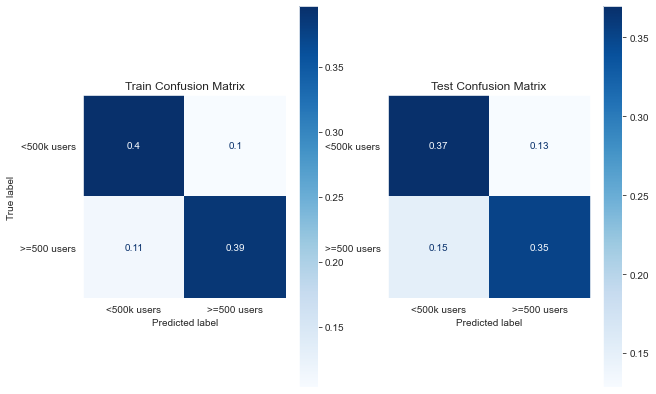

Logistic Regression Model Testing R-Square 0.7207415990730012
Training AUC: 0.8619314262219168


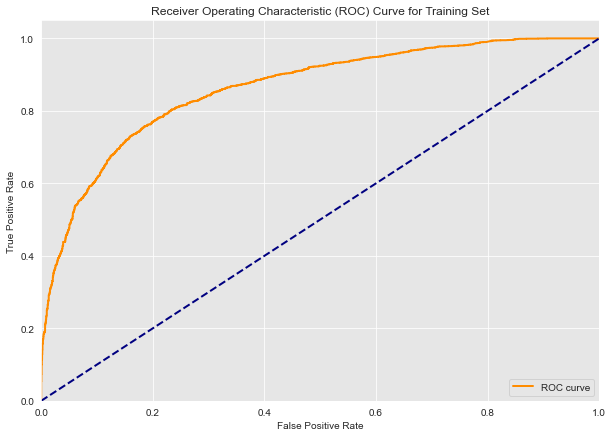

Test AUC: 0.7840512379827059



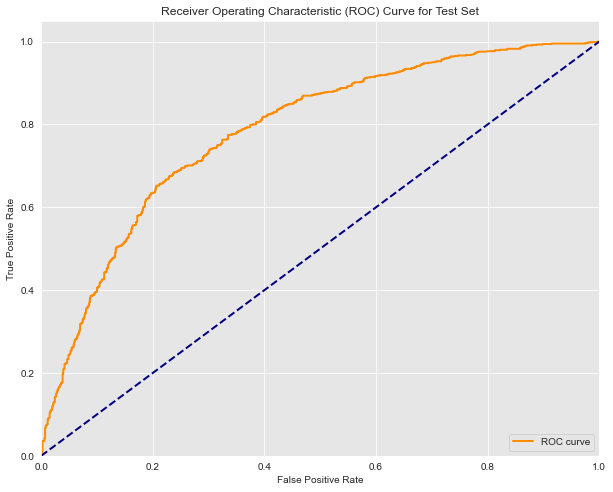

None

0.720814759117031

In [62]:
logreg = LogisticRegression(fit_intercept=False)
get_model(logreg)
print("Logistic Regression Model Testing R-Square", logreg.score(X_test, y_test))
display(get_roc(logreg))
display(get_auc(logreg))

## Scale & Over Sampling with Smote

In [14]:
# We have class imbalance so we'll scale and use SMOTE to over sample users<=500k
y_train.value_counts(normalize=True)

1    0.625607
0    0.374393
Name: over_500k, dtype: float64

In [15]:
from imblearn.over_sampling import SMOTE, ADASYN
features_resample, target_resample = SMOTE().fit_sample(X, y)
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
f_scale = ss.fit_transform(features_resample)
X_train, X_test, y_train, y_test = train_test_split(f_scale, target_resample, random_state=0)

In [16]:
# After over-sampling target
y_train.value_counts()

0    2592
1    2586
Name: over_500k, dtype: int64

              Classification Report for Training Set
              precision    recall  f1-score   support

 <500k users       0.78      0.79      0.79      2592
 >=500 users       0.79      0.78      0.78      2586

    accuracy                           0.79      5178
   macro avg       0.79      0.79      0.79      5178
weighted avg       0.79      0.79      0.79      5178

              Classification Report for Test Set
              precision    recall  f1-score   support

 <500k users       0.71      0.74      0.72       860
 >=500 users       0.73      0.70      0.72       866

    accuracy                           0.72      1726
   macro avg       0.72      0.72      0.72      1726
weighted avg       0.72      0.72      0.72      1726



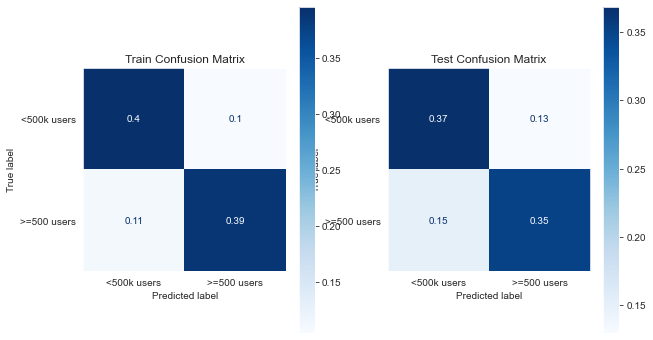

Training AUC: 0.861927248933001


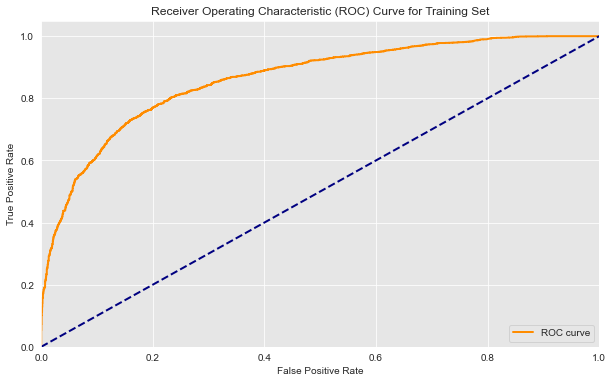

Test AUC: 0.7842996401525323



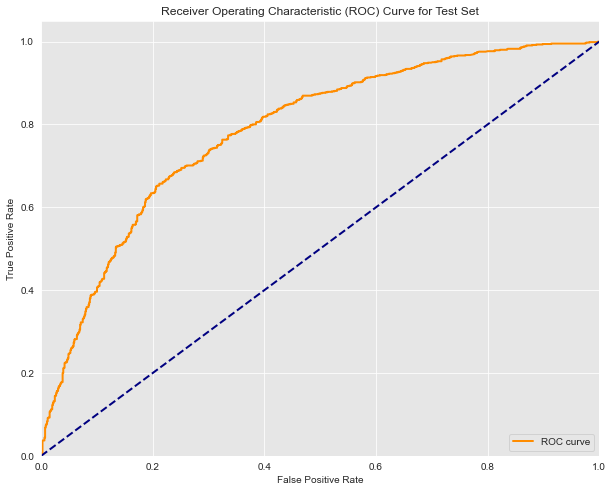

None

0.7202293356248992

In [17]:
# Much better results for logistic regresstion
logreg_sc_smote = LogisticRegression(random_state=42)
get_model(logreg_sc_smote)
display(get_roc(logreg_sc_smote))
display(get_auc(logreg_sc_smote))

## Hypertuned with GridSearch, Scale & Smote

In [18]:
# Will hypertuning make a difference?
logreg_gs = LogisticRegression()
param_grid = {'C': [0.0001, 0.001, 0.01, 0.1, 1],
              'solver': ['lbfgs', 'liblinear', 'sag'],
              'penalty': ['l2'], 
              'random_state': [42]
             }
log_gs = GridSearchCV(logreg_gs, param_grid, cv = 10)
log_gs.fit(X_train, y_train)
log_gs.best_params_

{'C': 0.001, 'penalty': 'l2', 'random_state': 42, 'solver': 'lbfgs'}

In [19]:
log_gs.best_estimator_

LogisticRegression(C=0.001, random_state=42)

              Classification Report for Training Set
              precision    recall  f1-score   support

 <500k users       0.78      0.79      0.79      2592
 >=500 users       0.79      0.78      0.78      2586

    accuracy                           0.78      5178
   macro avg       0.78      0.78      0.78      5178
weighted avg       0.78      0.78      0.78      5178

              Classification Report for Test Set
              precision    recall  f1-score   support

 <500k users       0.71      0.75      0.73       860
 >=500 users       0.74      0.70      0.72       866

    accuracy                           0.72      1726
   macro avg       0.72      0.72      0.72      1726
weighted avg       0.72      0.72      0.72      1726



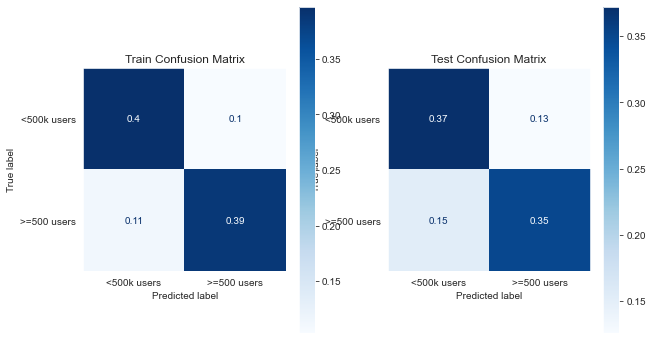

Training AUC: 0.861293494528945


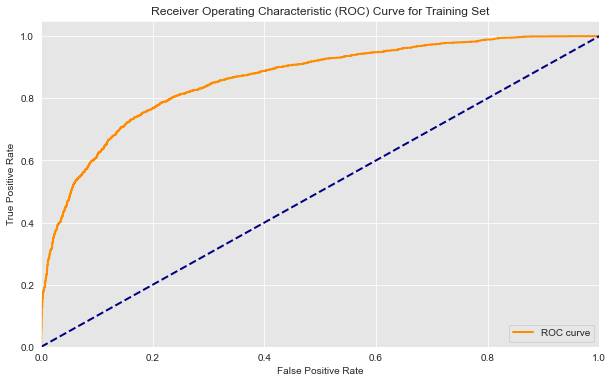

Test AUC: 0.785134808528922



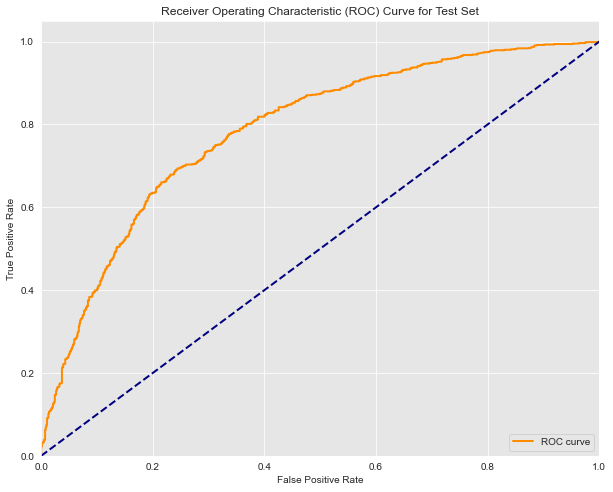

None

0.7225670014501316

In [20]:
logreg_gs_sc_smote = LogisticRegression(C=0.1, random_state=42)
get_model(logreg_gs_sc_smote)
display(get_roc(logreg_gs_sc_smote))
display(get_auc(logreg_gs_sc_smote))

In [21]:
# Reclusive Feature Elimination
from sklearn.feature_selection import RFE
predictors=features_resample
selector = RFE(logreg_gs_sc_smote, n_features_to_select = 1)
selector = selector.fit(predictors, target_resample);

In [22]:
selector.ranking_

array([314, 139, 385, 327, 339, 330, 408, 129, 157, 261, 186, 376, 217,
        94, 381, 190,  39, 156, 342, 406, 343,  12, 112, 162,  47, 263,
       415, 425, 389, 231, 366, 131, 240, 207, 252, 371,  80,  10, 171,
       245, 237, 108, 275, 222, 173,  32, 259, 201, 363,  71, 105, 174,
        26, 133, 344, 394, 273, 395, 223, 218, 179, 211, 189, 161, 137,
       300,  49,  55, 177,  28, 368,  38, 421, 167, 118,  95,  46,  92,
         1,  43, 116, 158, 423, 398, 281, 390,   9, 204,  63, 176,  42,
       294, 412, 348, 280,  84, 107, 323, 301,  18, 313, 142,  93, 308,
       125, 409,  31, 378, 326, 154, 226,   8, 175, 321, 319, 410,  74,
       244, 305,  44, 199, 304, 122, 426,  77, 250, 322, 120,  29,  13,
       236, 208, 143, 256, 354, 272, 285, 302, 192, 277, 209, 352, 370,
       229, 127, 130, 163, 111,  22, 289, 103, 146, 224, 117, 295, 225,
       102, 380, 379, 347, 106, 307, 182,  25, 219, 184,  15, 172, 262,
       279, 387,  23, 253,  89, 350,  98, 198, 298, 384, 362,  1

In [23]:
# feature_ranks = []
# for i in selector.ranking_:
#     feature_ranks.append(f"{i} {.columns[i]}")
# feature_ranks

In [24]:
from sklearn.feature_selection import SelectFromModel
smf = SelectFromModel(logreg_gs_sc_smote, max_features=20)
smf.fit(X_train, y_train)
feature_idx = smf.get_support()
feature_name = X.columns[feature_idx]
feature_name

Index(['Atmospheric', 'Based On A Novel', 'Benchmark', 'Card Battler',
       'Casual', 'Classic', 'Co-op', 'Comedy', 'Deckbuilding', 'Difficult',
       'Great Soundtrack', 'Moddable', 'Multiplayer', 'Open World', 'RPGMaker',
       'Simulation', 'Cheap', 'Expensive', 'Free', 'Midrange'],
      dtype='object')

In [25]:
# X_imputed_df = pd.DataFrame(X_train, columns = X.columns[feature_idx])

# def plot_feature_importances(model):
#     n_features = X_train.shape[1]
#     plt.figure(figsize=(8,8))
#     plt.barh(range(n_features), smf.get_support(), align='center') 
#     plt.yticks(np.arange(n_features), X_imputed_df.columns.values) 
#     plt.xlabel("Feature importance")
#     plt.ylabel("Feature")

# plot_feature_importances(logreg_gs_sc_smote)

## Simple KNN Model

              Classification Report for Training Set
              precision    recall  f1-score   support

 <500k users       0.70      0.89      0.78      2592
 >=500 users       0.85      0.61      0.71      2586

    accuracy                           0.75      5178
   macro avg       0.77      0.75      0.75      5178
weighted avg       0.77      0.75      0.75      5178

              Classification Report for Test Set
              precision    recall  f1-score   support

 <500k users       0.61      0.83      0.70       860
 >=500 users       0.73      0.47      0.58       866

    accuracy                           0.65      1726
   macro avg       0.67      0.65      0.64      1726
weighted avg       0.67      0.65      0.64      1726



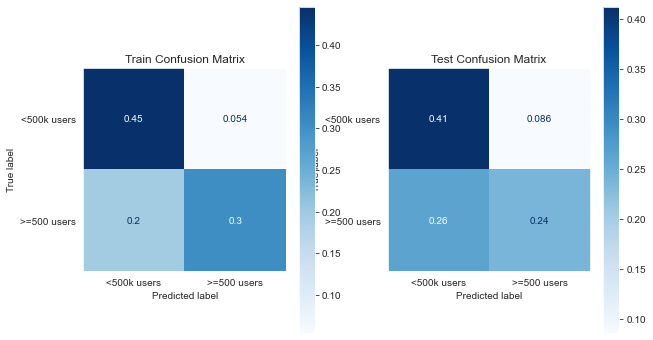

In [26]:
simple_knn_model = KNeighborsClassifier()
knn_model = get_model(simple_knn_model)

In [27]:
gs = KNeighborsClassifier()

min_k = 31
max_k = 43

param_grid = {'n_neighbors': list(range(min_k, max_k, 2)),
              'weights': ['uniform', 'distance'],
              'p': [1, 2, 3]
             }

gs_knn = GridSearchCV(gs, param_grid, cv=10)
gs_knn.fit(X_train, y_train)

gs_knn.best_params_

{'n_neighbors': 31, 'p': 3, 'weights': 'distance'}

## Decision Tree Classifier

              Classification Report for Training Set
              precision    recall  f1-score   support

 <500k users       0.99      1.00      0.99      2592
 >=500 users       1.00      0.99      0.99      2586

    accuracy                           0.99      5178
   macro avg       0.99      0.99      0.99      5178
weighted avg       0.99      0.99      0.99      5178

              Classification Report for Test Set
              precision    recall  f1-score   support

 <500k users       0.67      0.71      0.69       860
 >=500 users       0.69      0.65      0.67       866

    accuracy                           0.68      1726
   macro avg       0.68      0.68      0.68      1726
weighted avg       0.68      0.68      0.68      1726



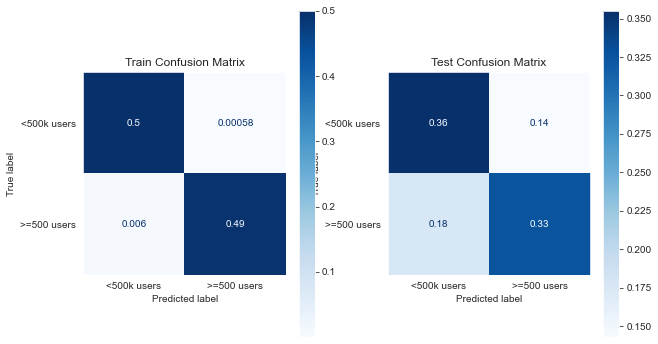

0.6808757183522208

In [28]:
dtc = DecisionTreeClassifier()
get_model(dtc)
display(get_auc(dtc))

In [29]:
# Set parameters
params = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [10, 50, 100, 150],
    'min_samples_leaf' : [.25, .50, 1,],
    'max_features' : ['sqrt', 'log2', 'auto']
}

In [30]:
num_decision_trees = 2 * 6 * 3
print(f"Grid Search will have to search through {num_decision_trees} different permutations.")

Grid Search will have to search through 36 different permutations.


In [31]:
# Get parameters
grid = GridSearchCV(dtc, param_grid=params, cv=3)
grid.fit(X_train, y_train)
grid.best_estimator_

DecisionTreeClassifier(max_depth=50, max_features='log2')

In [32]:
# Find best parameters
best_parameters = grid.best_params_
best_parameters

{'criterion': 'gini',
 'max_depth': 50,
 'max_features': 'log2',
 'min_samples_leaf': 1}

              Classification Report for Training Set
              precision    recall  f1-score   support

 <500k users       0.95      1.00      0.98      2592
 >=500 users       1.00      0.95      0.97      2586

    accuracy                           0.98      5178
   macro avg       0.98      0.98      0.98      5178
weighted avg       0.98      0.98      0.98      5178

              Classification Report for Test Set 
              precision    recall  f1-score   support

 <500k users       0.65      0.73      0.69       860
 >=500 users       0.70      0.61      0.65       866

    accuracy                           0.67      1726
   macro avg       0.68      0.67      0.67      1726
weighted avg       0.68      0.67      0.67      1726



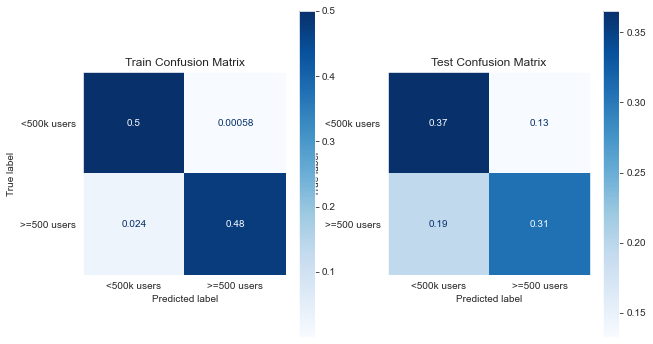

0.6734424512594661

In [33]:
dtuned1 = grid.best_estimator_
tuned_metrics(grid.best_estimator_)
get_auc(dtuned1)
display(get_auc(dtuned1))

## Random Forest

              Classification Report for Training Set
              precision    recall  f1-score   support

 <500k users       0.72      0.80      0.76      2592
 >=500 users       0.77      0.68      0.72      2586

    accuracy                           0.74      5178
   macro avg       0.74      0.74      0.74      5178
weighted avg       0.74      0.74      0.74      5178

              Classification Report for Test Set
              precision    recall  f1-score   support

 <500k users       0.68      0.75      0.72       860
 >=500 users       0.73      0.65      0.69       866

    accuracy                           0.70      1726
   macro avg       0.70      0.70      0.70      1726
weighted avg       0.70      0.70      0.70      1726



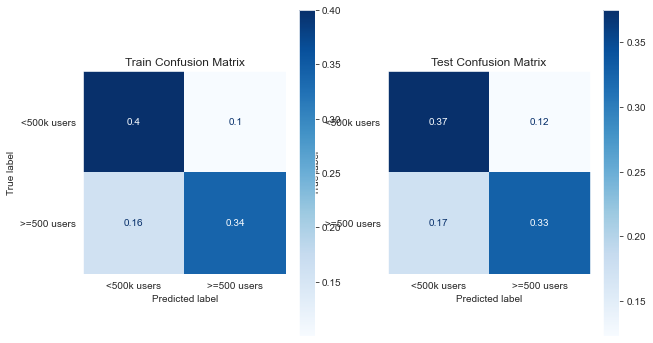

0.7023752618293141

In [34]:
rfc = RandomForestClassifier(criterion='entropy', max_depth = 5)
get_model(rfc)
display(get_auc(rfc))

In [35]:
para_grid= {'criterion': ('gini', 'entropy'), 
              'n_estimators':[10, 30, 50, 100, 200, 300], 
              'max_features': ('auto', 'sqrt', 'log2')}

In [36]:
rtc_grid = RandomForestClassifier(random_state=51)
rf_tuned_grid = GridSearchCV(rtc_grid, param_grid = params, cv=3)

In [37]:
rf_tuned_grid.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=51),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [10, 50, 100, 150],
                         'max_features': ['sqrt', 'log2', 'auto'],
                         'min_samples_leaf': [0.25, 0.5, 1]})

In [38]:
# Find the best parameters
rf_tuned_grid.best_params_

{'criterion': 'gini',
 'max_depth': 50,
 'max_features': 'sqrt',
 'min_samples_leaf': 1}

In [39]:
# Find best estimator
rf_tuned_grid.best_estimator_

RandomForestClassifier(max_depth=50, max_features='sqrt', random_state=51)

              Classification Report for Training Set
              precision    recall  f1-score   support

 <500k users       0.98      1.00      0.99      2592
 >=500 users       1.00      0.98      0.99      2586

    accuracy                           0.99      5178
   macro avg       0.99      0.99      0.99      5178
weighted avg       0.99      0.99      0.99      5178

              Classification Report for Test Set 
              precision    recall  f1-score   support

 <500k users       0.75      0.76      0.75       860
 >=500 users       0.76      0.74      0.75       866

    accuracy                           0.75      1726
   macro avg       0.75      0.75      0.75      1726
weighted avg       0.75      0.75      0.75      1726



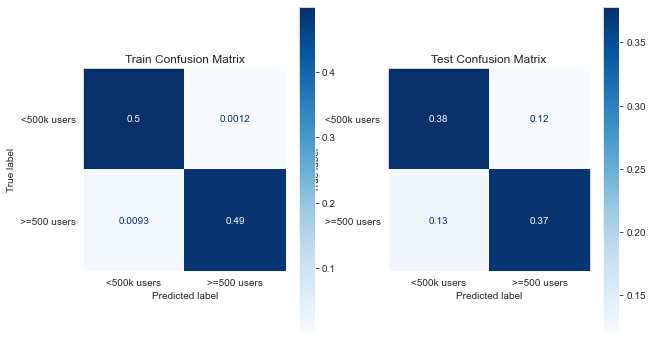

0.7520530103657553

In [40]:
rf_tuned = rf_tuned_grid.best_estimator_
tuned_metrics(rf_tuned_grid.best_estimator_)
display(get_auc(rf_tuned))

## XGBoost

              Classification Report for Training Set
              precision    recall  f1-score   support

 <500k users       0.77      0.82      0.79      2592
 >=500 users       0.80      0.75      0.78      2586

    accuracy                           0.78      5178
   macro avg       0.78      0.78      0.78      5178
weighted avg       0.78      0.78      0.78      5178

              Classification Report for Test Set
              precision    recall  f1-score   support

 <500k users       0.71      0.75      0.73       860
 >=500 users       0.73      0.69      0.71       866

    accuracy                           0.72      1726
   macro avg       0.72      0.72      0.72      1726
weighted avg       0.72      0.72      0.72      1726



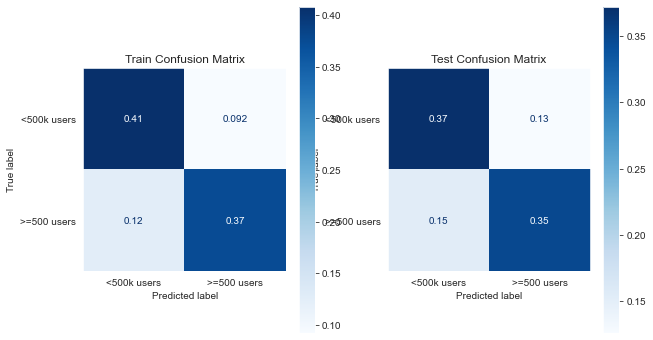

0.7202535044846662

In [41]:
# Instantiate an GradientBoostingClassifier
xgb_clf = GradientBoostingClassifier(random_state=42)
get_model(xgb_clf)
# check AUC of predictions
display(get_auc(xgb_clf))

## Grid Search XGBoost

In [43]:
gs_model = XGBClassifier()

# l_r = [0.001, 0.01, 0.1, 1, 10]
# _max_depth = list(range(3,11))

l_r = [0.1]
_max_depth = [4]

param_grid = {'n_estimators': list(range(180, 225, 5)),
              'learning_rate': l_r,
              'max_depth': _max_depth,
              'objective': ['binary:logistic'],
              'booster': ['gbtree'],
              'tree_method': ['exact'],
              'random_state': [42]
             }

gs_rf = GridSearchCV(gs_model, param_grid, cv=10)
gs_rf.fit(X_train, y_train)

gs_rf.best_params_

{'booster': 'gbtree',
 'learning_rate': 0.1,
 'max_depth': 4,
 'n_estimators': 220,
 'objective': 'binary:logistic',
 'random_state': 42,
 'tree_method': 'exact'}

In [44]:
gs_rf.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=4,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=220, n_jobs=0, num_parallel_tree=1, random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

              Classification Report for Training Set
              precision    recall  f1-score   support

 <500k users       0.81      0.87      0.84      2592
 >=500 users       0.85      0.79      0.82      2586

    accuracy                           0.83      5178
   macro avg       0.83      0.83      0.83      5178
weighted avg       0.83      0.83      0.83      5178

              Classification Report for Test Set
              precision    recall  f1-score   support

 <500k users       0.71      0.77      0.74       860
 >=500 users       0.75      0.69      0.72       866

    accuracy                           0.73      1726
   macro avg       0.73      0.73      0.73      1726
weighted avg       0.73      0.73      0.73      1726



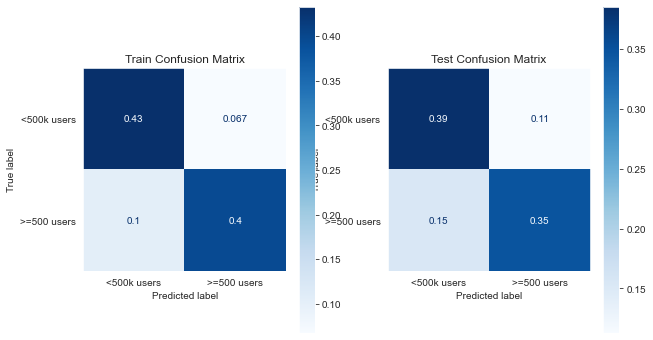

0.7330482303023793

In [45]:
gs_xgb_model = XGBClassifier(booster='gbtree',
                             learning_rate= 0.1,
                             max_depth= 4,
                             n_estimators= 210,
                             objective= 'binary:logistic',
                             random_state= 42,
                             tree_method= 'exact')
get_model(gs_xgb_model)
display(get_auc(gs_xgb_model))

## Feature Importance

In [51]:
def plot_feature_importances(model, name):
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

    final_model_feature_importance = {name: importance for name, importance in zip(X_train.columns, model.feature_importances_)}

    fi_series = pd.Series(final_model_feature_importance)
    fi_series.sort_values(ascending=True, inplace=True)

    feature_list = list(fi_series.index[-15:])
    importance_list = list(fi_series.values[-15:]*100)

    feature_list = list(map(lambda x: x.replace('_', ' ') if x.find('_') != -1 else x, feature_list))
    feature_list = list(map(lambda x: x.replace('-', '') if (x.find('-') != -1 and x.find('player') != -1) else x, feature_list))
    feature_list = list(map(lambda x: x.replace('-', '') if (x.find('-') != -1 and x.find('player') != -1) else x, feature_list))
    feature_list = list(map(lambda x: x.title(), feature_list))

    fig, ax = plt.subplots(figsize=(24,12))

    ax.barh(y=feature_list, width=importance_list, color='#2255ff')

    ax.set_title(f'{name} Feature Importance (Top 10)', fontsize=30, pad=14)
    ax.set_xlabel('Score (%)', fontsize=24, labelpad=10)
    ax.set_ylabel('', fontsize=24, labelpad=10)
    ax.set_xticks(np.arange(0, 27.5, 2.5))
    ax.set_xticklabels(np.arange(0, 27.5, 2.5), fontsize=18)
    ax.set_yticks(feature_list)
    ax.set_yticklabels(feature_list, fontsize=18)
    ax.tick_params(axis='both', which='major', pad=8)
    
    return model

DecisionTreeClassifier()

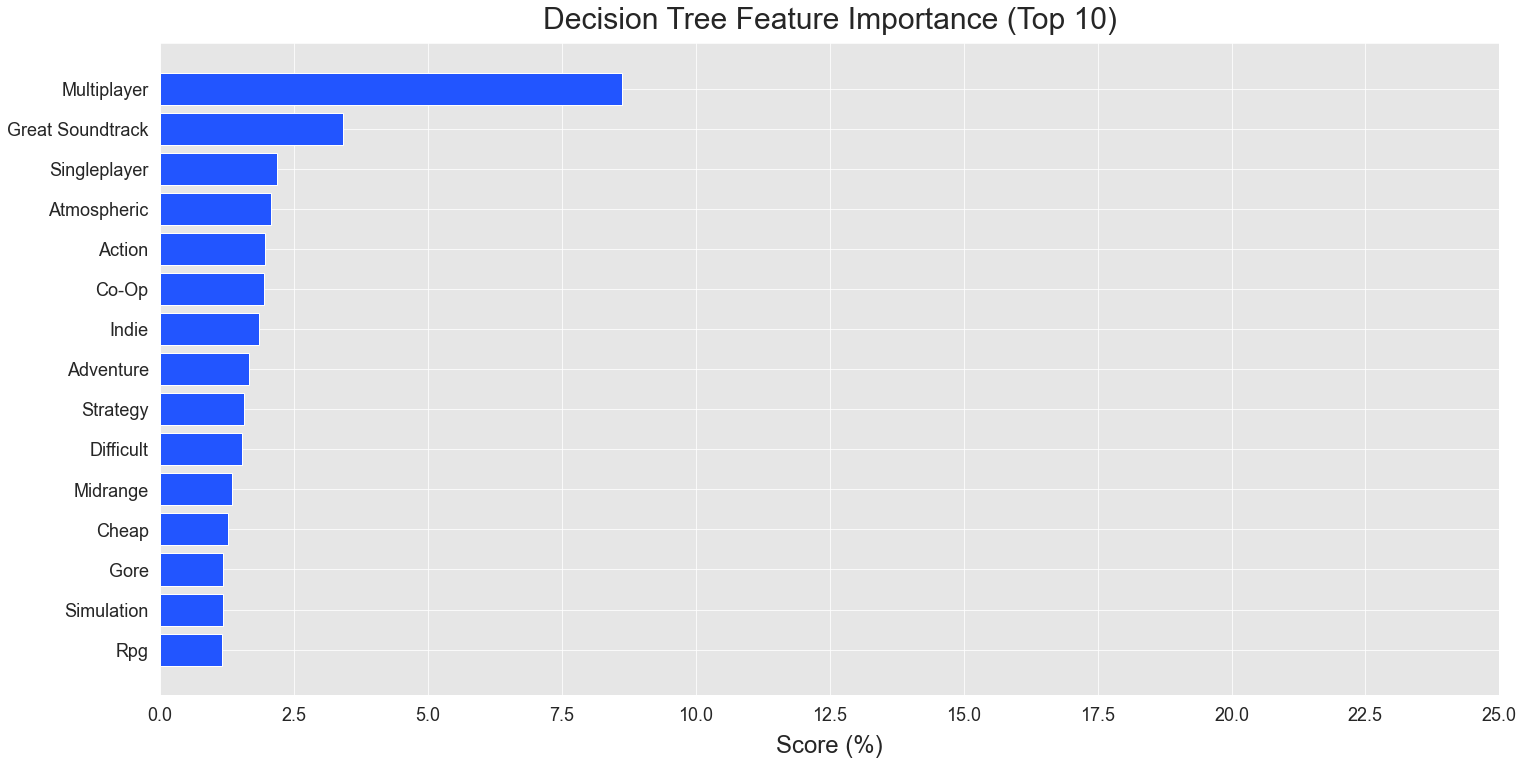

In [52]:
plot_feature_importances(dtc, 'Decision Tree')

DecisionTreeClassifier(max_depth=50, max_features='log2')

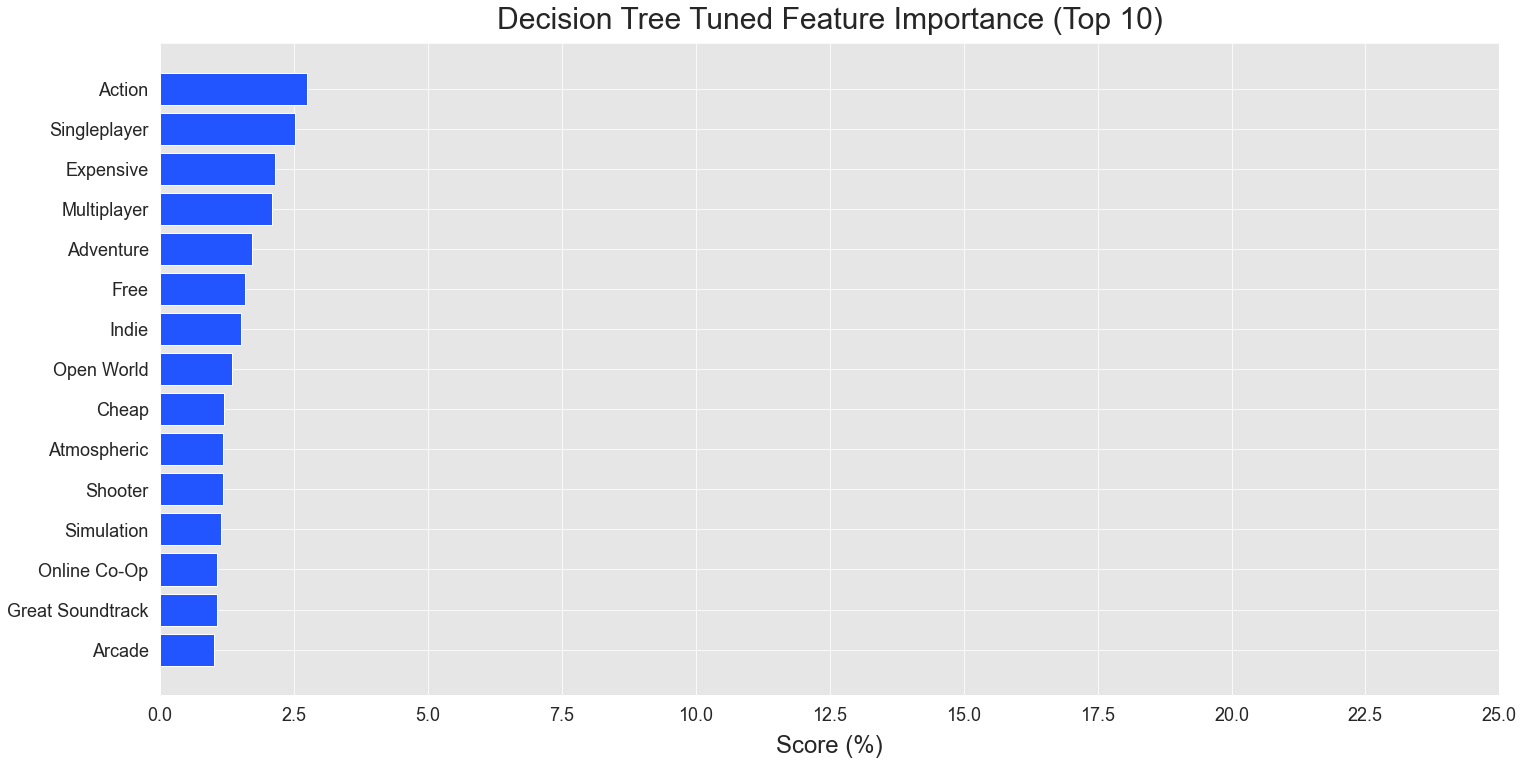

In [53]:
plot_feature_importances(dtuned1, 'Decision Tree Tuned')

RandomForestClassifier(criterion='entropy', max_depth=5)

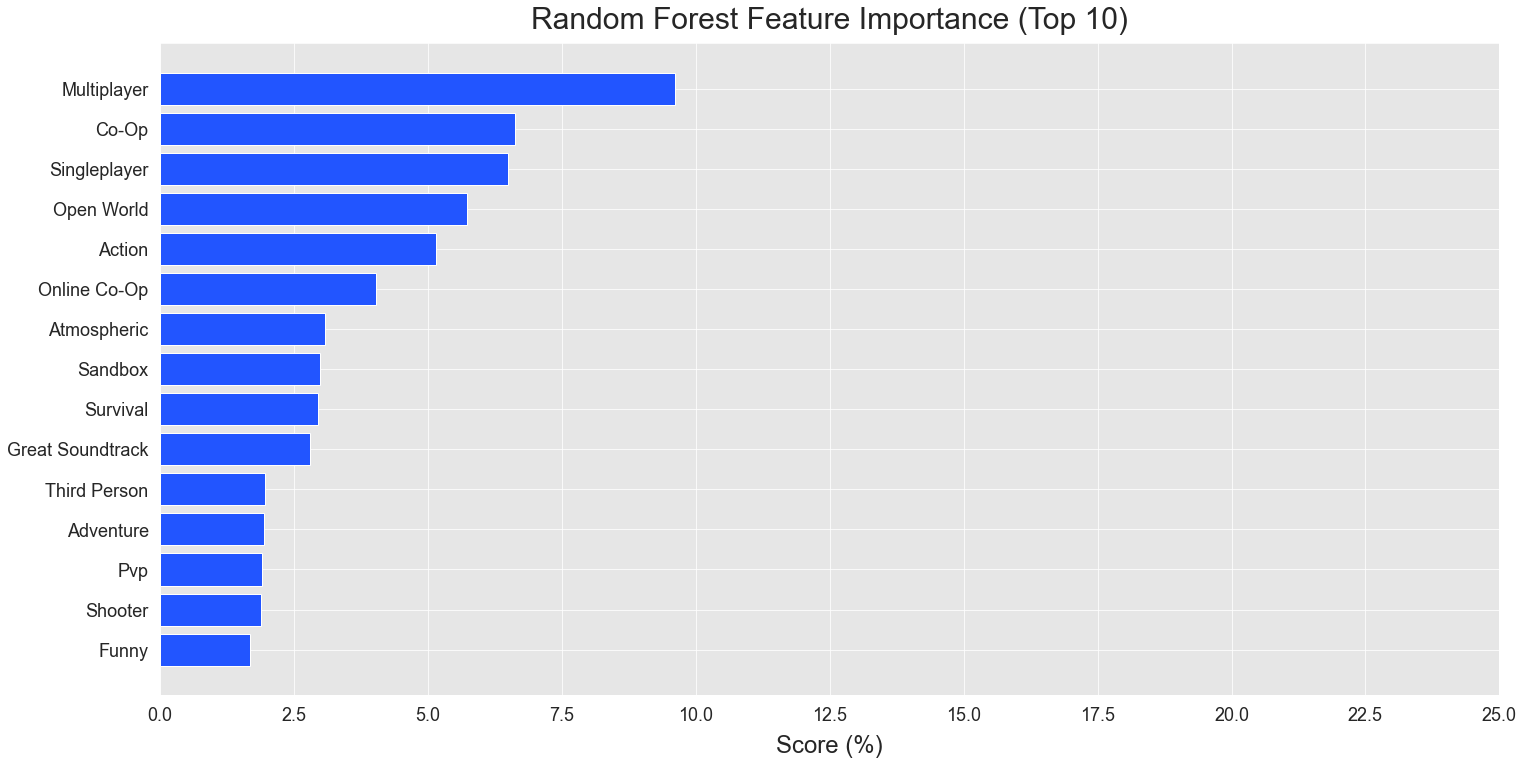

In [54]:
plot_feature_importances(rfc, 'Random Forest')
    
# plt.savefig('./images/rtc_feature_importance.jpg', dpi=300, transparent=True)

RandomForestClassifier(max_depth=50, max_features='sqrt', random_state=51)

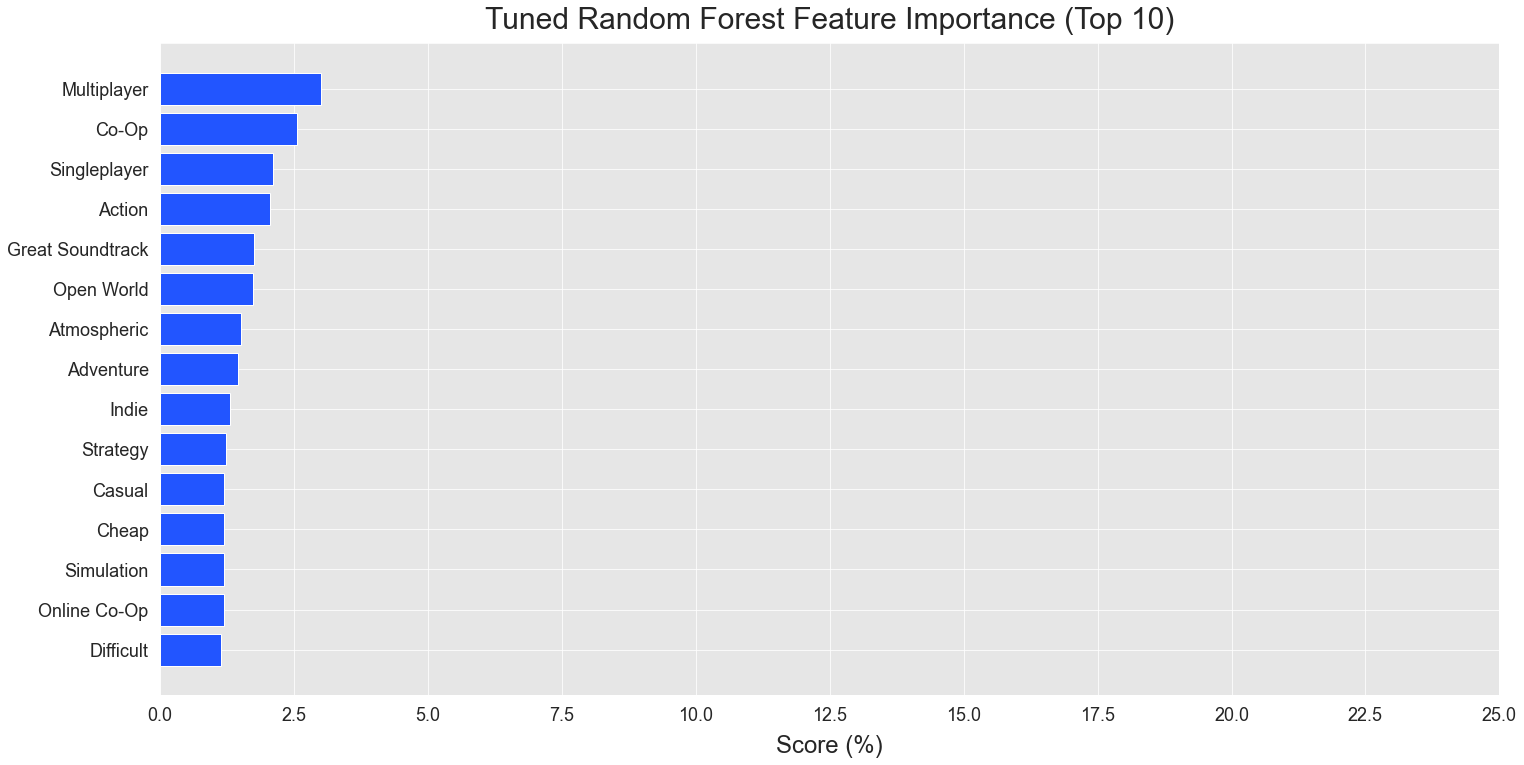

In [55]:
plot_feature_importances(rf_tuned, 'Tuned Random Forest')

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=4,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=210, n_jobs=0, num_parallel_tree=1, random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

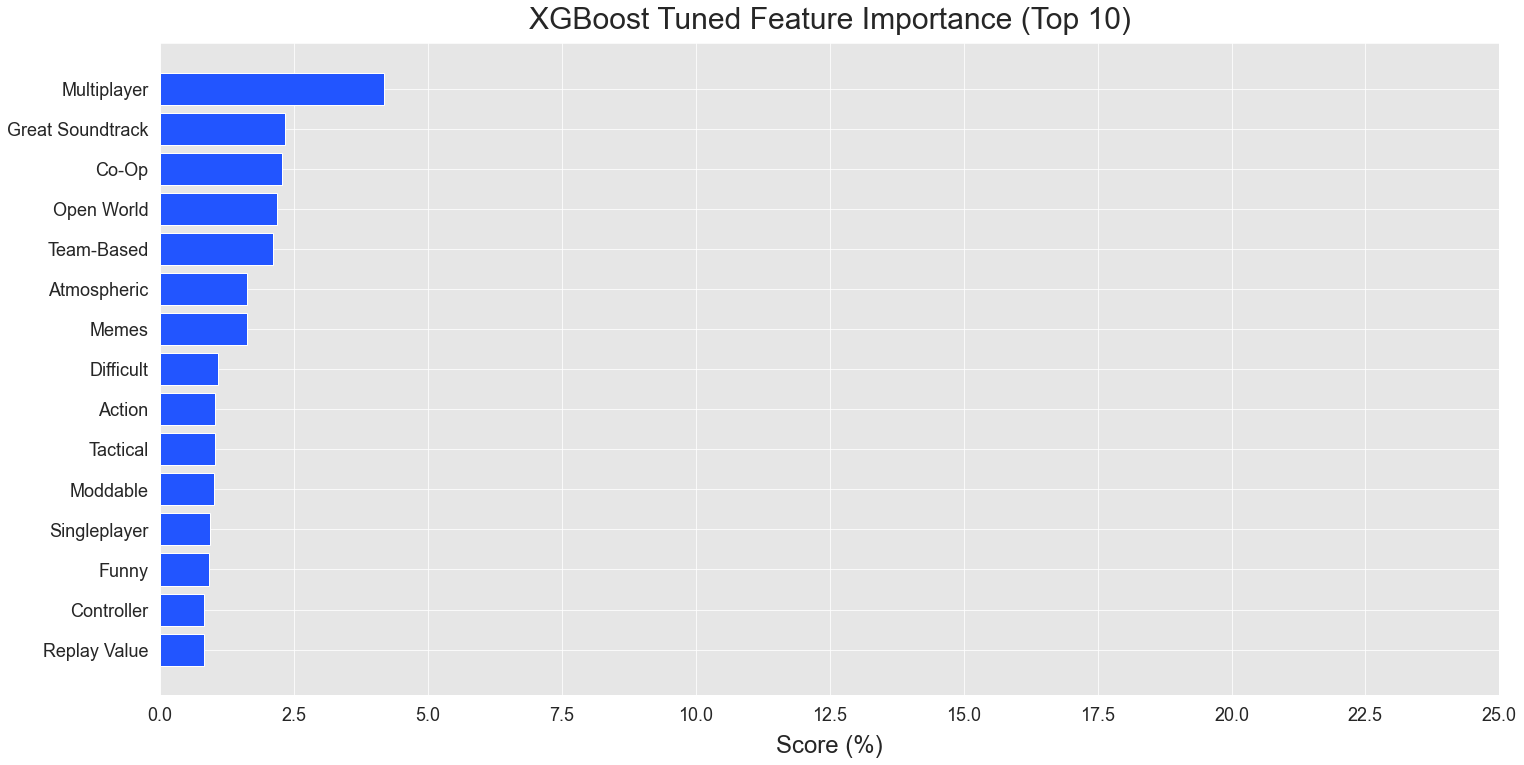

In [56]:
plot_feature_importances(gs_xgb_model, 'XGBoost Tuned')

GradientBoostingClassifier(random_state=42)

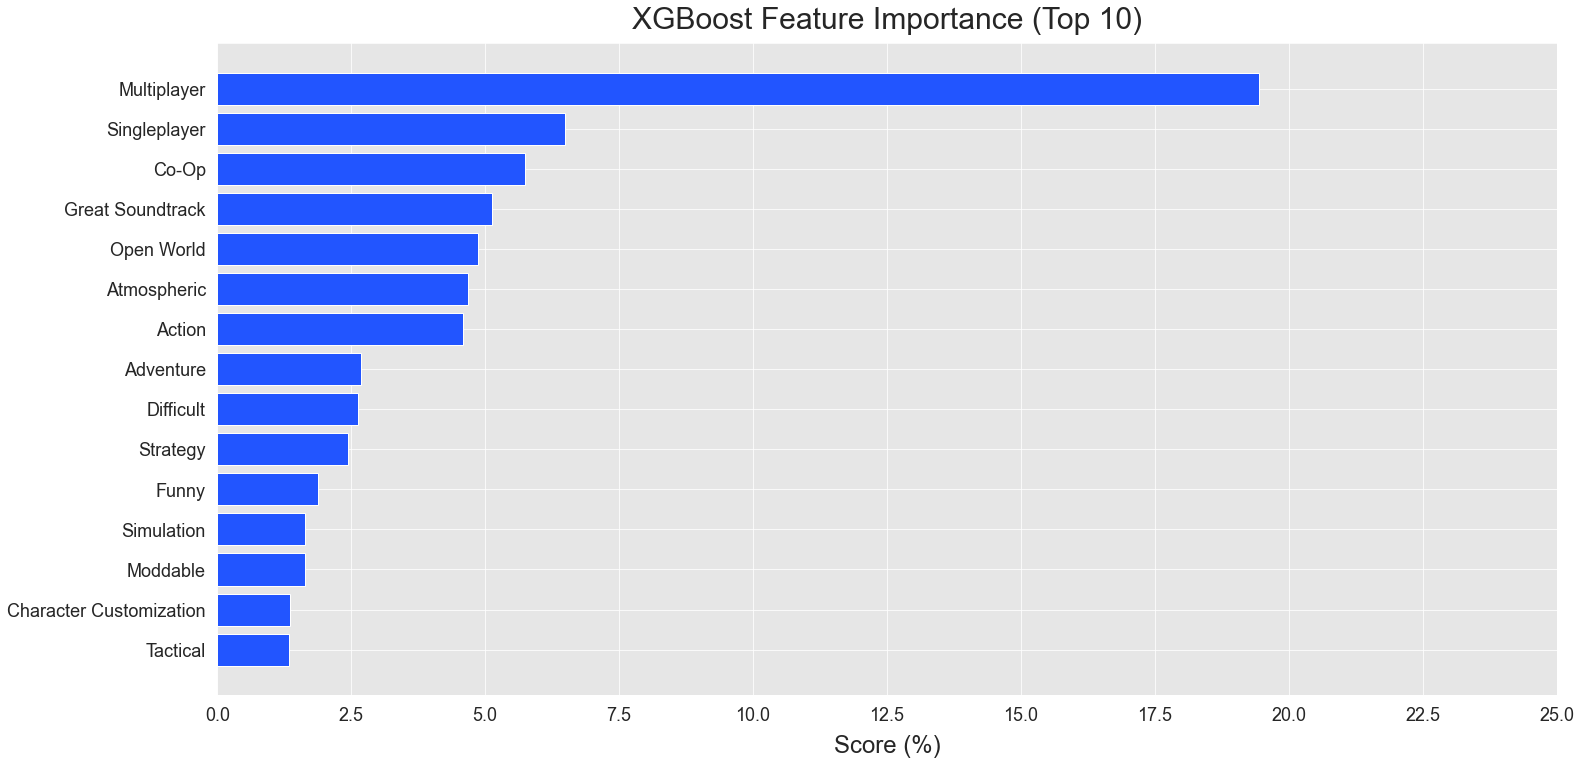

In [57]:
plot_feature_importances(xgb_clf, 'XGBoost')

## Conclusion

